In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sys
sys.path.append(r'/Users/manick/Python Training/CustomPackages')
import udp_draw_decision_tree as ddt
import os
#os.chdir(r'E:\Kaggle\TitanicNew')

In [4]:
import pandas as pd
import os
os.chdir(r'/Users/manick/Python Training/dataset')

infile = pd.read_csv('train.csv')
predfile = pd.read_csv('test.csv')
mergfile = infile.append(predfile,sort=True)

In [5]:
def calculate_classification_metrics(actual,pred):
    import pandas as pd
    truth_tab = pd.crosstab(actual,pred)
    print(truth_tab)
    sensitivity = truth_tab.iloc[1,1] / (truth_tab.iloc[1,1] + truth_tab.iloc[1,0])
    precision = truth_tab.iloc[1,1] / (truth_tab.iloc[1,1] + truth_tab.iloc[0,1])
    overall_accuracy =  (truth_tab.iloc[0,0] + truth_tab.iloc[1,1]) / len(actual)
    print("Accuracy    = ",round(overall_accuracy*100,4))
    print("Sensitivity = ",round(sensitivity*100,2))
    print("Precision   = ",round(precision*100,2))

In [6]:
str1 = 'Braund, Mr. Owen Harris'
str1.split(',')[1]

' Mr. Owen Harris'

In [7]:
titledf=mergfile['Name'].str.split(',',expand=True)
titledf=titledf[1].str.split('.',expand=True)
mergfile['Title'] = titledf[0].str.strip()
mergfile.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs


In [8]:
titledf=mergfile['Name'].str.split(',',expand=True)
titledf

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
413,Spector,Mr. Woolf
414,Oliva y Ocana,Dona. Fermina
415,Saether,Mr. Simon Sivertsen
416,Ware,Mr. Frederick


In [9]:
#mergfile['Title'].value_counts()

In [10]:
mergfile.pivot_table(index='Title',values='Age',aggfunc='mean')
mergfile.loc[mergfile['Age'].isnull(),'Title'].value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Title, dtype: int64

In [11]:
mergfile.loc[ (mergfile['Age'].isnull() ) & (mergfile['Title'] == 'Mr'), 'Age'] = 32
mergfile.loc[ (mergfile['Age'].isnull() ) & (mergfile['Title'] == 'Mrs'), 'Age'] = 35
mergfile.loc[ (mergfile['Age'].isnull() ) & (mergfile['Title'] == 'Dr'), 'Age'] = 40
mergfile.loc[ (mergfile['Age'].isnull() ) & (mergfile['Title'] == 'Master'), 'Age'] = 5
mergfile.loc[ (mergfile['Age'].isnull() ) & (mergfile['Title'] == 'Miss'), 'Age'] = 21
mergfile.loc[ (mergfile['Age'].isnull() ) & (mergfile['Title'] == 'Ms'), 'Age'] = 28

In [12]:
mergfile.loc[mergfile['Embarked'].isnull(),'Embarked']='S'

In [13]:
mergfile.pivot_table(index='Pclass',values='Fare',aggfunc='describe')
mergfile.loc[mergfile['Fare'].isnull(),'Fare']=8

In [14]:
mergfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [15]:
mergfile['FamilySize'] = mergfile['Parch'] + mergfile['SibSp'] + 1
mergfile['FamilySize'].value_counts()
mergfile['FamilyCatg'] = pd.cut(mergfile['FamilySize'],[0,1,2,4,200],  \
                                 labels=['Single','Couple','Small','Large'])

In [16]:
catg_df = pd.get_dummies(mergfile.loc[:,['Sex','Embarked','FamilyCatg','Title']], drop_first=True)
num_df  = mergfile.loc[:, ['Age','Fare','Parch','Pclass','SibSp','Survived','PassengerId']]
new_df  = pd.concat( [num_df, catg_df ] , axis=1 )

new_df.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'PassengerId',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilyCatg_Couple',
       'FamilyCatg_Small', 'FamilyCatg_Large', 'Title_Col', 'Title_Don',
       'Title_Dona', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [17]:
modtrain = new_df.loc[ new_df['Survived'] <= 1 , : ]
modtest = new_df.loc[ new_df['Survived'].isnull(), : ]
print(modtrain.shape, modtest.shape)

(891, 30) (418, 30)


In [18]:
modtrain.to_csv('modtrain.csv',index=None)
modtest.to_csv('modtest.csv',index=None)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
import sys
from IPython.display import Image
sys.path.append(r':/Users/manick/Python Training/CustomPackages')
import udp_draw_decision_tree as ddt

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = modtrain.drop(columns=['PassengerId','Survived'])
y = modtrain['Survived']

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.25,random_state=14111)

In [23]:
dtmod = DecisionTreeClassifier(min_impurity_decrease=0.01)
dtmod.fit(train_x,train_y)

predTrain = dtmod.predict(train_x)
calculate_classification_metrics(train_y, predTrain)

predTest = dtmod.predict(test_x)
calculate_classification_metrics(test_y, predTest)

col_0     0.0  1.0
Survived          
0.0       351   57
1.0        66  194
Accuracy    =  81.5868
Sensitivity =  74.62
Precision   =  77.29
col_0     0.0  1.0
Survived          
0.0       126   15
1.0        25   57
Accuracy    =  82.0628
Sensitivity =  69.51
Precision   =  79.17


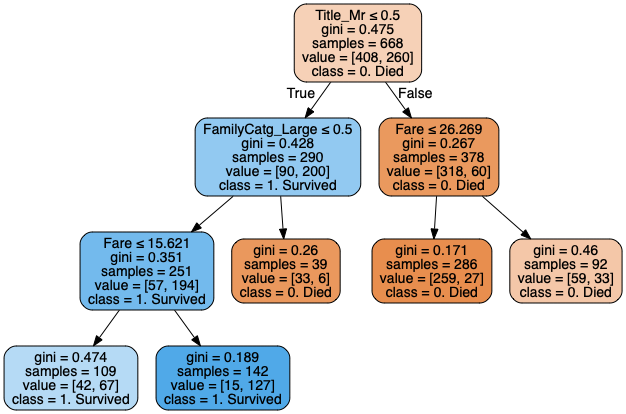

In [28]:
import pandas as pd
import pydotplus
ddt.draw_decision_tree (x.columns,["0. Died","1. Survived"],dtmod,"titanic.png")
Image("titanic.png")

In [34]:
outdf['Survived'].value_counts()

KeyError: 'Survived'

In [35]:
164 / 418

0.3923444976076555

In [36]:
p1 = dtmod.predict(x)
pd.crosstab(y,p1)

col_0,0.0,1.0
Survived,,
0.0,477,72
1.0,91,251


In [37]:
catg_df = pd.get_dummies(infile.loc[:,['Sex']],
                        drop_first=True)
catg_df
modfile = pd.concat([catg_df,infile],axis=1)
modfile.head(2)

,Sex_male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [38]:
x = modfile.loc[:, ['Sex_male','Pclass']]
y = modfile['Survived']

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.25,random_state=1234,stratify=y)



In [39]:
dtmod = DecisionTreeClassifier()
dtmod.fit(train_x,train_y)
predTrain = dtmod.predict(train_x)
pd.crosstab(train_y,predTrain)

col_0,0,1
Survived,,
0,405,7
1,133,123


In [40]:
catgdf = pd.get_dummies(predfile.loc[:, ['Sex']],\
            drop_first=True)
modfile = pd.concat( [predfile,catgdf] , axis=1 )
pred_x = modfile.loc[:, ['Sex_male','Pclass']]
predFinal = dtmod.predict(pred_x)

In [41]:
outdf = pd.DataFrame()
outdf['PassengerId'] = predfile['PassengerId']
outdf['Survived'] = predFinal
outdf.to_csv('Titanic Predictions.csv',index=None)

In [42]:
outdf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [43]:
import os
os.getcwd()

'/Users/manick/Python Training/dataset'

In [44]:
def calculate_classification_metrics(actual,pred):
    import pandas as pd
    truth_tab = pd.crosstab(actual,pred)
    print(truth_tab)
    sensitivity = truth_tab.iloc[1,1] / (truth_tab.iloc[1,1] + truth_tab.iloc[1,0])
    precision = truth_tab.iloc[1,1] / (truth_tab.iloc[1,1] + truth_tab.iloc[0,1])
    overall_accuracy =  (truth_tab.iloc[0,0] + truth_tab.iloc[1,1]) / len(actual)
    print("Accuracy    = ",round(overall_accuracy*100,4))
    print("Sensitivity = ",round(sensitivity*100,2))
    print("Precision   = ",round(precision*100,2))

In [45]:
len(train_x.columns)

2

In [46]:
dtmod = DecisionTreeClassifier(min_impurity_decrease=0.01)
dtmod.fit(train_x,train_y)
predTrain = dtmod.predict(train_x)
calculate_classification_metrics(train_y, predTrain)
predTest = dtmod.predict(test_x)
calculate_classification_metrics(test_y, predTest)

col_0       0    1
Survived          
0         405    7
1         133  123
Accuracy    =  79.0419
Sensitivity =  48.05
Precision   =  94.62
col_0       0   1
Survived         
0         135   2
1          48  38
Accuracy    =  77.5785
Sensitivity =  44.19
Precision   =  95.0


col_0       0    1
Survived          
0         405    7
1         133  123
Accuracy    =  79.0419
Sensitivity =  48.05
Precision   =  94.62
col_0       0   1
Survived         
0         135   2
1          48  38
Accuracy    =  77.5785
Sensitivity =  44.19
Precision   =  95.0


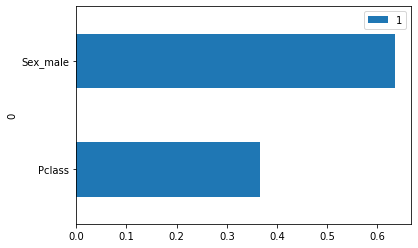

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfmod = RandomForestClassifier(n_estimators=100,min_impurity_decrease=0.01,random_state=1234)
rfmod.fit(train_x,train_y)

predTrain = rfmod.predict(train_x)
calculate_classification_metrics(train_y, predTrain)

predTest = rfmod.predict(test_x)
calculate_classification_metrics(test_y, predTest)

varimp = pd.DataFrame([train_x.columns,rfmod.feature_importances_]).T
varimp = varimp.sort_values(by=1,ascending=True)

%matplotlib inline
varimp.plot.barh(x=0,y=1) # 0 and 1 is the col heading

In [48]:
pd.DataFrame([train_x.columns,
                      rfmod.feature_importances_]).T

,0,1
0,Sex_male,0.634974
1,Pclass,0.365026


pip install xgboost - Type this in anaconda prompt
adaboost, gbm, 
xgboost - extreme gradient boosting
gbm - gradient boosting machines

In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
train = xgb.DMatrix(train_x, label=train_y)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [50]:
xgbmod = xgb.XGBClassifier(missing=9999999999,
                max_depth = 7,
                n_estimators=100,
                learning_rate=0.001, 
                seed=1301)
cvresult = xgb.cv(xgbmod.get_xgb_params(),  \
          train,num_boost_round=300,  \
                  nfold=5,\
                  metrics=['logloss'],
                  early_stopping_rounds=100, 
                  stratified=True, 
                  seed=1234)
cvresult.shape[1] # Best number of trees

4

In [51]:
xgbmod = xgb.XGBClassifier(missing=9999999999,
                            max_depth = 7,
                            n_estimators=cvresult.shape[1],
                            learning_rate=0.001, 
                            seed=1234)
xgbmod.fit(train_x,train_y)

predTrain = xgbmod.predict(train_x)
calculate_classification_metrics(train_y, predTrain)

predTest = xgbmod.predict(test_x)
calculate_classification_metrics(test_y, predTest)

col_0       0    1
Survived          
0         405    7
1         133  123
Accuracy    =  79.0419
Sensitivity =  48.05
Precision   =  94.62
col_0       0   1
Survived         
0         135   2
1          48  38
Accuracy    =  77.5785
Sensitivity =  44.19
Precision   =  95.0
